In [23]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [24]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util,correlation_plots

import imp
imp.reload(correlation_plots)

<module 'correlation_plots' from '/home/sebouh/di-hadron/correlation_plots.py'>

In [57]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

mixtag='xQ2_'
dfs_mixed = {}#a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [58]:
directory = "/home/seba/di-hadron/P27/"
dfs_data = {a : root_pandas.read_root(f"{directory}/Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C C D_Fe Fe Pb D_Pb".split()}


dfs_trigger = {a : root_pandas.read_root(f"{directory}/Pairs_%s.root" %a.replace("D_",""),a+"_trigger") for a in "D_C C D_Fe Fe Pb D_Pb".split()}



In [59]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    dfs_trigger['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    dfs_data['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
    
print (dfs_trigger.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])


In [60]:
#now load MC
#dfs_data.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a) for a in "Pb D C Fe".split()})




In [61]:
#dfs_trigger.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a + "_trigger") for a in "Pb D C Fe".split()})



In [63]:
for dct in dfs_data, dfs_trigger:
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])
    print(dct.keys())

<ipython-input-63-0be926274307>:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])


dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])


In [64]:
for df in dfs_data.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_mixed.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_trigger.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)

In [65]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_data.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    if key in dfs_mixed.keys() and 'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    
    if 'h1_cm_pt' not in dfs_data[key].columns:
        dfs_data[key].eval("h1_cm_pt = h1_cm_")
    
    data_trigger_cuts = dfs_data[key]#R2h_module.applyCuts(dfs_data[key],nomCuts=True)
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key],nomCuts=True)
    
    print(mixed_trigger_cuts)
    dfs_data[key + '_2pi'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False)
    dfs_data[key + '_pi_p'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=True)
    dfs_trigger[key] = R2h_module.applyCuts(dfs_trigger[key],name='default',isMC=isMC,isTrigger=True,
                                 nomCuts=True)
    if key in dfs_mixed.keys():
        mixed_trigger_cuts = R2h_module.applyCuts(dfs_mixed[key])    
        dfs_mixed[key + '_2pi'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=False)
        dfs_mixed[key + '_pi_p'] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                                 nomCuts=True,h2Proton=True)
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p'],
    #          dfs_mixed[key + '_2pi'],dfs_mixed[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
             E  mixevt_E       e_p  mixevt_e_p      e_th  mixevt_e_th  \
entry                                                                   
0        5.014     5.014  1.712664    2.069132  0.448546     0.376894   
1        5.014     5.014  1.712664    1.926008  0.448546     0.402084   
2        5.014     5.014  1.712664    1.525837  0.448546     0.492809   
3        5.014     5.014  1.712664    1.664888  0.448546     0.449163   
4        5.014     5.014  1.712664    1.664888  0.448546     0.449163   
...        ...       ...       ...         ...       ...          ...   
3078854  5.014     5.014  2.057893    1.712610  0.363822     0.386087   
3078855  5.014     5.014  2.057893    2.411273  0.363822     0.314615   
3078856  5.014     5.014  2.057893    1.615495  0.363822     0.406724   
3078857  5.014     5.014  2.057893    1.463008  0.363822     0.431407   
3078858  5.014     5.014  2.057893    2.215620  0.363822     0.317498   

             e_ph  mixevt_e_ph  h1_pid  h2_p

AttributeError: 'NoneType' object has no attribute 'shape'

In [66]:
def plot1d(df_A,df_D,df_triggers_A=None,df_triggers_D=None,
                              fig=None,bins=np.linspace(1.2,2.5,13),
              df_mix_A=None,df_mix_D=None,color=None,label=None,linestyleFit='-',fillstyle='full',
                   marker='o',markersize=7,shift=0, xvar='pair_mass',
              sys_err=None,band=False, query=None):
    if query is not None:
        df_A= df_A.query(query)
        if df_D is not None:
            df_D= df_D.query(query)
            
    nbins = len(bins)-1
    if df_triggers_A is None:
        denom = len(df_A)*2*np.pi/nbins
    else:
        denom = len(df_triggers_A)
    y, x = np.histogram(df_A.eval(xvar), bins=bins)
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    if not df_mix_A is None:
        y_mix,_ = np.histogram(df_mix_A.eval(xvar), bins=bins)
        y_mix = np.divide(y_mix,len(df_mix_A)/nbins)
        y = y/y_mix
        dy = dy/y_mix
    if df_D is None:
        plt.errorbar(x+shift,y,dy,marker='o',color=color,linestyle='',label=label,fillstyle=fillstyle)
        return
        
        
    if df_triggers_D is None:
        denom = len(df_D)*2*np.pi/nbins
    else :
        denom = len(df_triggers_D)
    yd, _ = np.histogram(df_D.eval(xvar), bins=bins)
    dyd = np.sqrt(yd)
    yd=np.divide(yd,denom)
    dyd=np.divide(dyd,denom)
    
    
    if not df_mix_D is None:
        y_mix,_ = np.histogram(df_mix_D.eval(xvar), bins=bins)
        y_mix = np.divide(y_mix,len(df_mix_D)/nbins)
        yd = yd/y_mix
    
    
    dyc = y/yd*np.hypot(dy/y, dyd/yd)
    yc= y/yd
    
    if not band:
        plt.errorbar(x+shift,yc,dyc,marker='o',color=color,linestyle='',
                     label=label,fillstyle=fillstyle,capsize=3)

        if sys_err is not None:
            plt.errorbar(x+shift,yc,np.hypot(dyc,sys_err*yc),marker=None, color=color,
                         linestyle='')
    else :
        plt.plot(x,yc, marker='', linestyle='-',label=label,linewidth=4,alpha=0.5)
    #print(label, yc, dyc)
def plot_R2h_all(xvar, vartex,bins,topo ="pi_p",query=None,legend=True,include_GiBUU=False):
    for i,(a,col) in enumerate(zip('C Fe Pb'.split(),"tab:blue tab:orange tab:green".split())):
        plot1d(dfs_data[a+"_"+topo],dfs_data["D_"+a+"_"+topo],
               df_triggers_A=dfs_trigger[a],
               df_triggers_D=dfs_trigger["D_"+a],color=col, query=query,
              xvar=xvar, bins=bins,label = "This work, " + a,shift=(bins[1]-bins[0])*(i-1)/10)
        if include_GiBUU:
            plot1d(dfs_data[f"GiBUU_{a}_{topo}"],dfs_data[f"GiBUU_D_{topo}"],
                   df_triggers_A=dfs_trigger["GiBUU_"+a],
                   df_triggers_D=dfs_trigger["GiBUU_"+"D"],color=col, query=query,
                  xvar=xvar, bins=bins,label = "GiBUU, " + a,shift=(bins[1]-bins[0])*(i-1)/10,band=True)
    plt.gca().set_xlabel(vartex)
    plt.gca().set_ylabel("$R_{2h}$")
    plt.axhline(1, color='0.7',linestyle='--',alpha=0.5)
    if legend:
        plt.legend(framealpha=0,ncol=2 if include_GiBUU else 1)
    plt.gca().set_ylim(0)

In [67]:
print(dfs_data.keys())

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D', 'D_C_2pi'])


KeyError: 'C_pi_p'

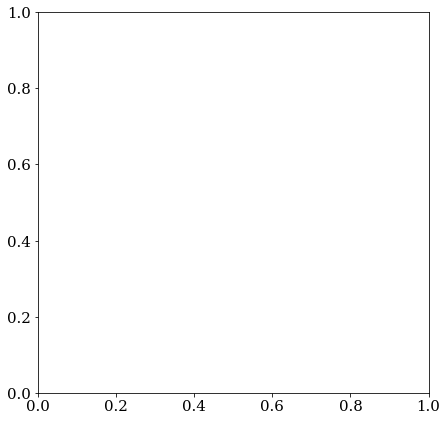

In [68]:
variables = []
variables.append(("pair_mass", "$m_{\\pi p}$ [GeV]",np.linspace(1.2,2.8,16)))
variables.append(("h2_z", "$z_2$",np.linspace(0.2,0.8,14)))
variables.append(("dphi", "$|\\Delta\\phi|$ [rad]",np.linspace(0,np.pi,8)))


for xvar,vartex, bins in variables:
    fig, axs = plt.subplots(1,1,figsize=(7,7))
    plot_R2h_all(xvar,vartex,bins,topo ="pi_p")
    plt.savefig(f"R2h_pi_p_{xvar}.png")
    plt.show()

In [69]:
class BinnedVariable:
    def __init__(self,var,tex,bins,unit):
        self._var=var
        self._tex=tex
        self._bins=bins
        self._unit=unit
        
    #formats the variable to display a label for an axis
    def axis_label(self,):
        if self._unit is not None:
            return f"{self._tex} [{self._unit}]"
        else :
            return self._tex
    #formats the label for a slice
    def slice_label(self, i,f="%.2f"):
        ret = f"{f}<{self._tex}<{f}" %(self._bins[i],self._bins[i+1])
        if self._unit is not None:
            ret += " " + self._unit
        return ret
    #formats the query string for slicing
    def slice_query(self,i):
        return f"{self._bins[i]}<{self._var} and {self._var}<{self._bins[i+1]}"
    #returns a queried dataframe
    def query(self,df,i):
        return df.query(slice_query(i))
    def count_query(self,df,i):
        return len(query(self,df,i))
    def bin_center(self,i,shift_frac=0):
        return (self._bins[i]+self._bins[i+1])/2 + \
            shift_frac*(self._bins[i+1]-self._bins[i])
    def auto_bins(self,df, nbins,style="linear"):
        a = df.eval(self._var)
        if style=="linear":
            self._bins=np.linspace(np.min(a),np.max(a),nbins+1)
        if style=="quantile":
            self._bins=[a.quantile(q) for q in np.linspace(0,1,nbins+1)]
        return self._bins

In [70]:
def slicePlots(xvar,slicevar,topo):
    fig, axs = plt.subplots(2,2,figsize=(14,14))
    ymax=0
    for i in range(4):
        plt.sca(axs[i//2][i%2])
        query = slicevar.slice_query(i)+" and h1_cm_pt**2 >0.005 and h2_cm_pt**2 >0.005"
        plot_R2h_all(xvar._var,xvar.axis_label(),xvar._bins,topo =topo,query=query, 
                     legend=i==0,include_GiBUU=True)
        plt.gca().set_title(slicevar.slice_label(i))
        if plt.gca().get_ylim()[1]>ymax:
            ymax=plt.gca().get_ylim()[1]
    for i in range(4):
        axs[i//2][i%2].set_ylim(0,ymax)

dphi=BinnedVariable("dphi", "$|\\Delta\\phi|$", np.linspace(0,np.pi,9), "rad")

#x,Q2,z1,z2,pT1,pT2,m_pipi
x = BinnedVariable("x", "$x$", np.linspace(0.1,0.5,5), "")
Q2 = BinnedVariable("Q2", "$Q^2$", np.linspace(1,3,5), "GeV$^2$")
z1 = BinnedVariable("h1_z", "$z_1$", np.linspace(0.5,0.9,5), "")
z2 = BinnedVariable("h2_z", "$z_2$", np.linspace(0.1,0.45,5), "")
pair_mass = BinnedVariable("pair_mass", "$m_{\pi\pi}$", np.linspace(0.4,1.3,5), " GeV")
pt1 = BinnedVariable("h1_cm_pt", "$p_T^1$", np.linspace(0.1,2,5), " GeV")
pt2 = BinnedVariable("h2_cm_pt", "$p_T^2$", np.linspace(0.1,2,5), " GeV")

for slicevar in [x,Q2,z1,z2,pt1,pt2,pair_mass]:
    slicevar.auto_bins(dfs_data['C_2pi'],4,"quantile")
    slicePlots(dphi, slicevar, "2pi")
    plt.tight_layout()
    plt.savefig(f"images/slices_R2h_dphi_{slicevar._var}.png")
    plt.show()


KeyError: 'C_2pi'

In [ ]:
dfs_data['GiBUU_D_2pi'].columns

In [ ]:

imp.reload(correlation_plots)
for label,topo,fillstyle,linestyleFit in zip('$\\pi\\pi$ $\\pi{}p$'.split(),
                                             '_2pi _pi_p'.split(),'full full'.split(), '----'):
    
    dyranges = [(0,0.5), (0.5,1), (1,1.5),(1.5,2)]
    fig,axs = plt.subplots(2,len(dyranges),figsize=(14,7),sharex='all',sharey='row')
    
    for j,dyrange in enumerate(dyranges):
        query = f"h2_z>0.1 and h1_z>0.5"
        if dyrange:
             query += f" and diff_rap_cm>{dyrange[0]} and diff_rap_cm<{dyrange[1]}"
        for a,col in zip('D C Fe Pb'.split(),"krbg"):
            A = dfs_data[a+topo].query(query)
            triggers_A = dfs_trigger[a].query('h1_z>0.5')
            mix_A = dfs_mixed[a+topo].query(query) 

            if a != 'D':
                D = dfs_data['D_'+a+topo].query(query)
                triggers_D = dfs_trigger['D_'+a].query('h1_z>0.5')
                mix_D = dfs_mixed['D_'+a+topo].query(query) 

            plt.sca(axs[0][j])
            #nuclear
            correlation_plots.general_1D_plot(A,None,df_triggers_A=triggers_A,
                          projyrange=(-1,3.0),bins1d=10,
                                                  df_mix_A=mix_A,color=col,label=a,
                                              plotFourier=2,fillstyle=fillstyle,linestyleFit='-' if a == 'D' else '')
            plt.sca(axs[1][j])
            #nuclear
            if a != 'D':
                correlation_plots.general_1D_plot(A,D,df_triggers_A=triggers_A,df_triggers_D=triggers_D,
                          projyrange=(-1,3.0),bins1d=10,
                                                  df_mix_A=mix_A,df_mix_D=mix_D,color=col,label=a,
                                              plotFourier=2 if topo=='_2pi' else 3,fillstyle=fillstyle,linestyleFit='-' if a == 'D' else '')
            plt.gca().set_xlim(0,2*np.pi)

        for ax in axs[1]:
            ax.set_xlabel("$\\Delta\\phi [rad]$")
        axs[1][j].axhline(1,color='0.7', linestyle='--')
        if topo=='_2pi':
            axs[1][j].set_ylim(0,1.5)
        else:
            axs[1][j].set_ylim(0,10)
            
        dyrangestr = f"${dyrange[0]}<\Delta y<{dyrange[1]}$" if dyrange else "all"
        axs[0][j].set_title(dyrangestr,fontsize='large')
    axs[0][0].text(.05,0.85, label,transform=axs[0][0].transAxes,fontsize='x-large')
        
    
    axs[0][0].set_ylabel("$C(\\Delta\\phi)$")
    axs[1][0].set_ylabel("$C_A(\\Delta\\phi)/C_D(\\Delta\\phi)$")
    axs[0][-1].legend(framealpha=0)
    fig.subplots_adjust(hspace=0,wspace=0)
    plt.savefig(image_dir+f"/summary_1d{topo}_slices.pdf",bbox_inches='tight')
    plt.show()

In [ ]:

imp.reload(correlation_plots)
for label,topo,fillstyle,linestyleFit in zip('$\\pi\\pi$ $\\pi{}p$'.split(), '_2pi _pi_p'.split(),'full full'.split(), '- -'.split()):
    for dyrange in None,:
        
        fig,axs = plt.subplots(1,2,figsize=(14,7),sharex='all')
        query = f"h2_z>0.1 and h1_z>0.5"
        if dyrange:
             query += f" and diff_rap_cm>{dyrange[0]} and diff_rap_cm<{dyrange[1]}"
        for a,col in zip('D C Fe Pb'.split(),"krbg"):
            linestyleFit='-' if a == 'D' else '--'
            A = dfs_data[a+topo].query(query)
            triggers_A = dfs_trigger[a].query('h1_z>0.5')
            mix_A = dfs_mixed[a+topo].query(query) 

            if a != 'D':
                D = dfs_data['D_'+a+topo].query(query)
                triggers_D = dfs_trigger['D_'+a].query('h1_z>0.5')
                mix_D = dfs_mixed['D_'+a+topo].query(query) 

            plt.sca(axs[0])
            #nuclear
            correlation_plots.general_1D_plot(A,None,df_triggers_A=triggers_A,
                          projyrange=(0,3.0),bins1d=10,
                                                  df_mix_A=mix_A,color=col,label=a,
                                              plotFourier=3,fillstyle=fillstyle,linestyleFit=linestyleFit)
            plt.sca(axs[1])
            #nuclear
            if a != 'D':
                correlation_plots.general_1D_plot(A,D,df_triggers_A=triggers_A,df_triggers_D=triggers_D,
                          projyrange=(0,3.0),bins1d=10,
                                                  df_mix_A=mix_A,df_mix_D=mix_D,color=col,label=a,
                                              plotFourier=3,fillstyle=fillstyle,linestyleFit=linestyleFit)
            plt.gca().set_xlim(0,2*np.pi)

        for ax in axs:
            ax.set_xlabel("$\\Delta\\phi [rad]$")
        axs[0].set_ylabel("$C(\\Delta\\phi)$")
        axs[1].set_ylabel("$C_A(\\Delta\\phi)/C_D(\\Delta\\phi)$")
        axs[1].axhline(1,color='0.7', linestyle='--')
        if topo=='_2pi':
            axs[1].set_ylim(0,1.2)
        else:
            axs[1].set_ylim(0,4)

        axs[0].text(.05,0.85, label,transform=plt.gca().transAxes,fontsize='x-large')
        axs[0].text(.05,0.75, "1<$Q^2$<4 GeV$^2$\n$y$<0.85",transform=plt.gca().transAxes)
        axs[0].legend(framealpha=0)
        dyrangestr = f"_{dyrange[0]}_{dyrange[1]}" if dyrange else ""
        plt.savefig(image_dir+f"/summary_1d{topo}{dyrangestr}.pdf",bbox_inches='tight')
        plt.show()

In [ ]:
useMix=False
for label,topo,fillstyle,linestyleFit in zip('$\\pi\\pi$ $\\pi{}p$'.split(), '_2pi _pi_p'.split(),'full full'.split(), '- -'.split()):
    for dyrange in None,:
        
        fig,axs = plt.subplots(1,2,figsize=(14,7),sharex='all')
        query = f"h2_z>0.1 and h1_z>0.5"
        if dyrange:
             query += f" and diff_rap_cm>{dyrange[0]} and diff_rap_cm<{dyrange[1]}"
        for j,(a,col) in enumerate(zip('D C Fe Pb'.split(),"krbg")):
            maxval=16
            linestyleFit='-' if a == 'D' else '--'
            A = dfs_data[a+topo].query(query)
            triggers_A = dfs_trigger[a].query('h1_z>0.5')
            mix_A = dfs_mixed[a+topo].query(query) 

            if a != 'D':
                D = dfs_data['D_'+a+topo].query(query)
                triggers_D = dfs_trigger['D_'+a].query('h1_z>0.5')
                mix_D = dfs_mixed['D_'+a+topo].query(query) 
            bins=8
            plt.sca(axs[0])
            shift = j*.1
            #nuclear
            plot_hypot(A,None,df_triggers_A=triggers_A,bins=bins,shift=shift,maxval=maxval,
                                                  df_mix_A=mix_A,color=col,label=a,fillstyle=fillstyle,linestyleFit=linestyleFit)
            plt.sca(axs[1])
            #nuclear
            if a != 'D':
                plot_hypot(A,D,df_triggers_A=triggers_A,df_triggers_D=triggers_D,
                          bins=bins, df_mix_A=mix_A if useMix else None,df_mix_D=mix_D if useMix else None,color=col,label=a,
                                           fillstyle=fillstyle,linestyleFit=linestyleFit,shift=shift,maxval=maxval)
            plt.gca().set_xlim(0,maxval)

        for ax in axs:
            ax.set_xlabel("$\\Delta R^2 = \\Delta\\phi^2+\\Delta y^2$")
        axs[0].set_ylabel("$C(\\Delta R)$")
        axs[1].set_ylabel("$C_A(\\Delta R)/C_D(\\Delta R)$")
        axs[1].axhline(1,color='0.7', linestyle='--')
        if topo=='_2pi':
            axs[1].set_ylim(0,1.7)
        else:
            axs[1].set_ylim(0,12)
        axs[0].set_ylim(0)

        axs[0].text(.05,0.85, label,transform=plt.gca().transAxes,fontsize='x-large')
        axs[0].text(.05,0.75, "1<$Q^2$<4 GeV$^2$\n$y$<0.85",transform=plt.gca().transAxes)
        axs[0].legend(framealpha=0)
        dyrangestr = f"_{dyrange[0]}_{dyrange[1]}" if dyrange else ""
        plt.savefig(image_dir+f"/hypot_1d{topo}{dyrangestr}.pdf",bbox_inches='tight')
        plt.show()

In [ ]:
df = dfs_data['D_pi_p']

plt.hist(df.W,bins=100, histtype='step',density=True)


In [ ]:

for a,col in zip('D C Fe Pb'.split(),'krgb'): 
    df = dfs_data[f'{a}_2pi']
    plt.hist(df.query('h2_z>0.15').pair_mass,bins=100,range=(0.4, 1.8),
             histtype='step', density = True, color=col, label = a)
plt.axvline(.7754, color='0.7', linestyle='--')
plt.legend()
plt.gca().set_xlabel('pair mass')
plt.gca().set_ylabel('arbitrary units')
plt.show()

In [ ]:
df = dfs_data[f'{a}_2pi']
side_band= len(df.query('pair_mass>0.6 and pair_mass<0.7 or pair_mass>0.9 and pair_mass<1.0'))
core = len(df.query('pair_mass>0.7 and pair_mass<0.9'))
print((core-side_band)/len(df))

In [ ]:
for a,col in zip('D C Fe Pb'.split(),'krgb'): 
    df = dfs_data[f'{a}_2pi']
    plt.hist(df.eval("h1_cm_pt**2*(h1_cm_pt<h2_cm_pt)+h2_cm_pt**2*(h2_cm_pt<h1_cm_pt)"),bins=100,range=(0, 1.0),
             histtype='step', density = True, color=col, label = a)
    print(len(df.query("h1_cm_pt**2*(h1_cm_pt<h2_cm_pt)+h2_cm_pt**2*(h2_cm_pt<h1_cm_pt)<0.005"))/len(df))
    
plt.legend()
plt.gca().set_xlabel('min($p^2_T(h_1),p^2_T(h_2)$) [GeV^2]')
plt.gca().set_ylabel('arbitrary units')
plt.savefig("images/pT2.png")
plt.show()

In [ ]:
print(dfs_data['D_2pi'].columns)
print(max(dfs_data['D_2pi'].inelasticity))